In [191]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

In [192]:
baseDeDonnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")
baseDeDonnees

C:\Users\test8\AppData\Local\Temp\ipykernel_7248\4192361592.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-04-06,8.1,5.31,3.90,-0.3,NaN,NaN,97,66.0,65.5,34,...,NaN,NaN,8.0,7.6,7.5,7.0,NaN,NaN,NaN,NaN
2025-04-05,7.4,4.45,4.50,1.6,NaN,NaN,96,73.6,74.5,53,...,NaN,NaN,8.0,7.5,6.5,5.0,NaN,NaN,NaN,NaN
2025-04-04,10.6,6.77,6.90,3.2,NaN,NaN,69,53.2,54.0,39,...,NaN,NaN,7.0,2.9,4.0,1.0,NaN,NaN,NaN,NaN
2025-04-03,18.8,8.31,9.60,0.4,NaN,NaN,93,77.2,69.5,46,...,NaN,NaN,8.0,6.2,4.0,0.0,NaN,NaN,NaN,NaN
2025-04-02,1.4,-2.20,-2.80,-7.0,NaN,-12.0,93,48.5,62.0,31,...,NaN,NaN,8.0,4.5,4.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-05,-10.6,-14.87,-17.50,-24.4,NaN,-24.0,87,79.5,74.0,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,-15.6,-21.03,-21.70,-27.8,NaN,-28.0,79,68.1,68.5,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,-10.0,-18.01,-16.95,-23.9,NaN,-28.0,76,61.0,59.5,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]

max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747783
                               ...   
min_cloud_cover_8            0.792024
max_cloud_cover_10           0.994154
avg_hourly_cloud_cover_10    0.994154
avg_cloud_cover_10           0.994154
min_cloud_cover_10           0.994154
Length: 71, dtype: float64

In [194]:
baseDeDonneesNettoyee = baseDeDonnees[["precipitation","snow","rain","max_temperature","min_temperature"]].copy()
baseDeDonneesNettoyee.columns = ["precip","snow","rain","temp_max","temp_min"]
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min
date,,,,,
2025-04-06,2.6,0.0,2.6,8.1,-0.3
2025-04-05,11.8,0.0,11.8,7.4,1.6
2025-04-04,0.0,0.0,0.0,10.6,3.2
2025-04-03,22.4,0.0,22.4,18.8,0.4
2025-04-02,1.6,1.4,0.2,1.4,-7.0
...,...,...,...,...,...
1970-01-05,1.5,2.3,0.0,-10.6,-24.4
1970-01-04,0.0,0.0,0.0,-15.6,-27.8
1970-01-03,0.0,0.0,0.0,-10.0,-23.9


In [195]:
null_prc = baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
null_prc

precip      0.001239
snow        0.003716
rain        0.004360
temp_max    0.000000
temp_min    0.000000
dtype: float64

In [196]:
#Remplissage des trous de donnés
baseDeDonneesNettoyee["snow"] = baseDeDonneesNettoyee["snow"].fillna(0)
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
baseDeDonneesNettoyee


,precip,snow,rain,temp_max,temp_min
date,,,,,
2025-04-06,2.6,0.0,2.6,8.1,-0.3
2025-04-05,11.8,0.0,11.8,7.4,1.6
2025-04-04,0.0,0.0,0.0,10.6,3.2
2025-04-03,22.4,0.0,22.4,18.8,0.4
2025-04-02,1.6,1.4,0.2,1.4,-7.0
...,...,...,...,...,...
1970-01-05,1.5,2.3,0.0,-10.6,-24.4
1970-01-04,0.0,0.0,0.0,-15.6,-27.8
1970-01-03,0.0,0.0,0.0,-10.0,-23.9


In [197]:
baseDeDonneesNettoyee.index = pd.to_datetime(baseDeDonneesNettoyee.index)
baseDeDonneesNettoyee.index


DatetimeIndex(['2025-04-06', '2025-04-05', '2025-04-04', '2025-04-03',
               '2025-04-02', '2025-04-01', '2025-03-31', '2025-03-30',
               '2025-03-29', '2025-03-28',
               ...
               '1970-01-10', '1970-01-09', '1970-01-08', '1970-01-07',
               '1970-01-06', '1970-01-05', '1970-01-04', '1970-01-03',
               '1970-01-02', '1970-01-01'],
              dtype='datetime64[ns]', name='date', length=20185, freq=None)

In [198]:
#Verification probleme data
baseDeDonneesNettoyee.apply(lambda x: (x==9999).sum())

precip      0
snow        0
rain        0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='date'>

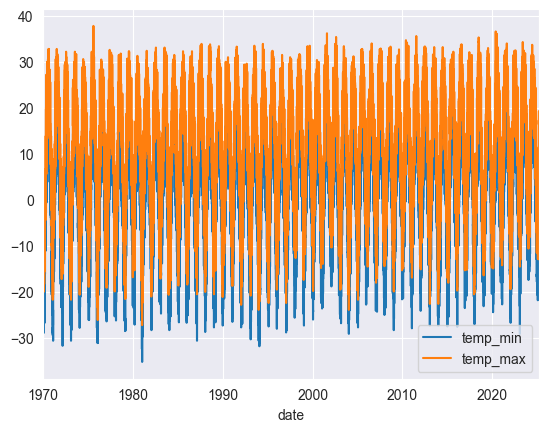

In [199]:
#Analyse pour savoir s'il y a un manque de data.
baseDeDonneesNettoyee[["temp_min","temp_max"]].plot()

In [200]:
#Choisir ce que je veux predire.
colonnes_a_predire = ["precip","snow","rain","temp_max","temp_min"]  # Tu peux en ajouter plus ici si tu veux
for col in colonnes_a_predire:
    baseDeDonneesNettoyee[f"target_{col}"] = baseDeDonneesNettoyee.shift(-1)[col]

baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
#Permet de mettre les dates en ordres.
baseDeDonneesNettoyee = baseDeDonneesNettoyee[::-1]
#Creation de mon model de Ml
reg = Ridge(alpha = .1)
predicteur = ["precip","snow","rain","temp_max","temp_min"]
train = baseDeDonneesNettoyee.loc[:"2023-12-31"]
test = baseDeDonneesNettoyee.loc["2024-01-01":]
reg.fit(train[predicteur],train["target_temp_max"])
reg.fit(train[predicteur],train["target_temp_min"])
predictions = reg.predict(test[predicteur])
baseDeDonneesNettoyee


,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min
date,,,,,,,,,,
1970-01-01,0.0,0.0,0.0,-13.9,-22.8,0.0,0.0,0.0,-13.9,-22.8
1970-01-02,0.0,0.0,0.0,-11.7,-17.8,0.0,0.0,0.0,-13.9,-22.8
1970-01-03,0.0,0.0,0.0,-10.0,-23.9,0.0,0.0,0.0,-11.7,-17.8
1970-01-04,0.0,0.0,0.0,-15.6,-27.8,0.0,0.0,0.0,-10.0,-23.9
1970-01-05,1.5,2.3,0.0,-10.6,-24.4,0.0,0.0,0.0,-15.6,-27.8
...,...,...,...,...,...,...,...,...,...,...
2025-04-02,1.6,1.4,0.2,1.4,-7.0,0.0,0.0,0.0,2.4,-5.0
2025-04-03,22.4,0.0,22.4,18.8,0.4,1.6,1.4,0.2,1.4,-7.0
2025-04-04,0.0,0.0,0.0,10.6,3.2,22.4,0.0,22.4,18.8,0.4


<Axes: xlabel='date'>

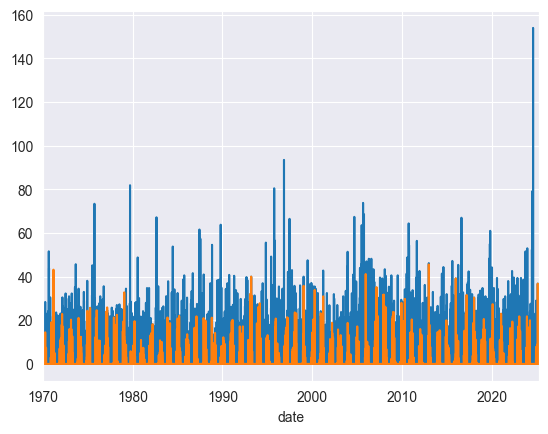

In [201]:
baseDeDonneesNettoyee.index.year.value_counts().sort_index()
baseDeDonneesNettoyee["precip"].plot()
baseDeDonneesNettoyee["snow"].plot()

In [202]:
 #Voir l'erreur de prediction dans le target en question
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target_temp_max"],predictions)

mean_absolute_error(test["target_temp_min"],predictions)



2.8216773337605003

,Bonne valeur,Valeur predite
date,,
2024-01-01,-4.2,-7.639779
2024-01-02,-4.5,-4.963728
2024-01-03,0.9,-1.233610
2024-01-04,1.9,-9.675436
2024-01-05,1.6,-11.177788
...,...,...
2025-04-02,2.4,-6.642349
2025-04-03,1.4,1.654374
2025-04-04,18.8,2.922244


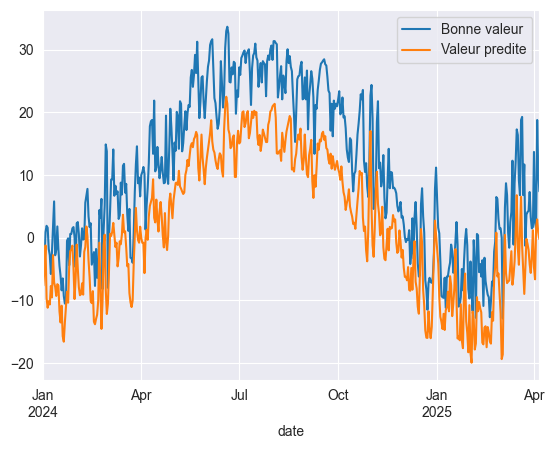

In [203]:
combined = pd.concat([test["target_temp_max"], pd.Series(predictions, index = test.index)],axis=1)
combined.columns=["Bonne valeur","Valeur predite"]
combined.plot()
reg.coef_
combined

In [204]:
#Ajout colonne comparaison temperature max par mois par rapport a la temperature du jour
baseDeDonneesNettoyee["mois_temp_max"] = baseDeDonneesNettoyee["temp_max"].rolling(30).mean()
baseDeDonneesNettoyee["ratio_mois_jour_tempmax"] = baseDeDonneesNettoyee["mois_temp_max"] / baseDeDonneesNettoyee["temp_max"]
baseDeDonneesNettoyee["ratio_max_min"] = baseDeDonneesNettoyee["temp_max"] / baseDeDonneesNettoyee["temp_min"]
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,,,,,
1970-01-01,0.0,0.0,0.0,-13.9,-22.8,0.0,0.0,0.0,-13.9,-22.8,NaN,NaN,0.609649
1970-01-02,0.0,0.0,0.0,-11.7,-17.8,0.0,0.0,0.0,-13.9,-22.8,NaN,NaN,0.657303
1970-01-03,0.0,0.0,0.0,-10.0,-23.9,0.0,0.0,0.0,-11.7,-17.8,NaN,NaN,0.418410
1970-01-04,0.0,0.0,0.0,-15.6,-27.8,0.0,0.0,0.0,-10.0,-23.9,NaN,NaN,0.561151
1970-01-05,1.5,2.3,0.0,-10.6,-24.4,0.0,0.0,0.0,-15.6,-27.8,NaN,NaN,0.434426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-02,1.6,1.4,0.2,1.4,-7.0,0.0,0.0,0.0,2.4,-5.0,6.883333,4.916667,-0.200000
2025-04-03,22.4,0.0,22.4,18.8,0.4,1.6,1.4,0.2,1.4,-7.0,7.350000,0.390957,47.000000
2025-04-04,0.0,0.0,0.0,10.6,3.2,22.4,0.0,22.4,18.8,0.4,7.413333,0.699371,3.312500


In [205]:
#Creer methode de prediction
def predire_et_ajouter_nouvelle_ligne(base, predicteurs, alpha=0.1, date_split="2023-12-31"):
    cibles = [col for col in base.columns if col.startswith("target_")]
    derniere_date = base.index[-1]
    date_demain = derniere_date + pd.Timedelta(days=1)

    # Préparer les données de prédiction
    donnees = base.iloc[-1][predicteurs].values.reshape(1, -1)
    nouvelle_ligne = pd.Series(index=base.columns, name=date_demain)

    # Copier les valeurs des prédicteurs
    for col in predicteurs:
        nouvelle_ligne[col] = base.iloc[-1][col]

    # Pour chaque cible, entraîner un modèle et faire la prédiction
    for cible in cibles:
        modele = Ridge(alpha=alpha)
        train = base.loc[:date_split]
        modele.fit(train[predicteurs], train[cible])
        prediction = modele.predict(donnees)[0]

        col_var = cible.replace("target_", "")
        nouvelle_ligne[col_var] = prediction
        nouvelle_ligne[cible] = base.iloc[-1][col_var]

    base = pd.concat([base, pd.DataFrame([nouvelle_ligne])])
    return base

In [206]:
#Voir la moyenne de temperature par mois
baseDeDonneesNettoyee["mois_temp_max"] = baseDeDonneesNettoyee["temp_max"].rolling(30).mean()

In [207]:
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
date,,,,,,,,,,,,,
1970-01-01,0.0,0.0,0.0,-13.9,-22.8,0.0,0.0,0.0,-13.9,-22.8,NaN,NaN,0.609649
1970-01-02,0.0,0.0,0.0,-11.7,-17.8,0.0,0.0,0.0,-13.9,-22.8,NaN,NaN,0.657303
1970-01-03,0.0,0.0,0.0,-10.0,-23.9,0.0,0.0,0.0,-11.7,-17.8,NaN,NaN,0.418410
1970-01-04,0.0,0.0,0.0,-15.6,-27.8,0.0,0.0,0.0,-10.0,-23.9,NaN,NaN,0.561151
1970-01-05,1.5,2.3,0.0,-10.6,-24.4,0.0,0.0,0.0,-15.6,-27.8,NaN,NaN,0.434426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-02,1.6,1.4,0.2,1.4,-7.0,0.0,0.0,0.0,2.4,-5.0,6.883333,4.916667,-0.200000
2025-04-03,22.4,0.0,22.4,18.8,0.4,1.6,1.4,0.2,1.4,-7.0,7.350000,0.390957,47.000000
2025-04-04,0.0,0.0,0.0,10.6,3.2,22.4,0.0,22.4,18.8,0.4,7.413333,0.699371,3.312500


In [208]:
predicteur = ["precip","snow","temp_max","temp_min","mois_temp_max","ratio_mois_jour_tempmax","ratio_max_min"]

In [209]:
#Enlever les valeurs NaN causer parce nous n'avons pas les valeurs des 30 jours avant pour pouvoir calculer la moyenne de temp_max pour la colonne mois_temp_max.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.iloc[30:,:].copy()
baseDeDonneesNettoyee
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonneesNettoyee.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.fillna(0)


In [210]:
baseDeDonneesNettoyee = predire_et_ajouter_nouvelle_ligne(baseDeDonneesNettoyee,predicteur)

baseDeDonneesNettoyee

C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid fe

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
1970-01-31,0.000000,0.300000,0.000000,1.700000,-18.900000,0.0,0.0,0.0,-3.3,-17.8,-10.460000,-6.152941,-0.089947
1970-02-01,0.000000,0.000000,0.000000,5.000000,0.000000,0.0,0.3,0.0,1.7,-18.9,-9.903333,-1.980667,0.000000
1970-02-02,9.700000,0.000000,9.700000,5.600000,1.100000,0.0,0.0,0.0,5.0,0.0,-9.383333,-1.675595,5.090909
1970-02-03,8.400000,8.900000,0.500000,3.900000,-18.900000,9.7,0.0,9.7,5.6,1.1,-8.733333,-2.239316,-0.206349
1970-02-04,0.500000,0.800000,0.000000,-18.300000,-26.100000,8.4,8.9,0.5,3.9,-18.9,-8.990000,0.491257,0.701149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-03,22.400000,0.000000,22.400000,18.800000,0.400000,1.6,1.4,0.2,1.4,-7.0,7.350000,0.390957,47.000000
2025-04-04,0.000000,0.000000,0.000000,10.600000,3.200000,22.4,0.0,22.4,18.8,0.4,7.413333,0.699371,3.312500
2025-04-05,11.800000,0.000000,11.800000,7.400000,1.600000,0.0,0.0,0.0,10.6,3.2,7.433333,1.004505,4.625000
2025-04-06,2.600000,0.000000,2.600000,8.100000,-0.300000,11.8,0.0,11.8,7.4,1.6,7.676667,0.947737,-27.000000


In [211]:
reg.coef_

array([ 0.02205335, -0.198184  , -0.04747147,  0.1732308 ,  0.75678454])

In [212]:
combined["diff"] = (combined["Bonne valeur"] - combined["Valeur predite"]).abs()
combined

,Bonne valeur,Valeur predite,diff
date,,,
2024-01-01,-4.2,-7.639779,3.439779
2024-01-02,-4.5,-4.963728,0.463728
2024-01-03,0.9,-1.233610,2.133610
2024-01-04,1.9,-9.675436,11.575436
2024-01-05,1.6,-11.177788,12.777788
...,...,...,...
2025-04-02,2.4,-6.642349,9.042349
2025-04-03,1.4,1.654374,0.254374
2025-04-04,18.8,2.922244,15.877756


In [213]:
combined.sort_values("diff",ascending=False).head()
baseDeDonneesNettoyee

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
1970-01-31,0.000000,0.300000,0.000000,1.700000,-18.900000,0.0,0.0,0.0,-3.3,-17.8,-10.460000,-6.152941,-0.089947
1970-02-01,0.000000,0.000000,0.000000,5.000000,0.000000,0.0,0.3,0.0,1.7,-18.9,-9.903333,-1.980667,0.000000
1970-02-02,9.700000,0.000000,9.700000,5.600000,1.100000,0.0,0.0,0.0,5.0,0.0,-9.383333,-1.675595,5.090909
1970-02-03,8.400000,8.900000,0.500000,3.900000,-18.900000,9.7,0.0,9.7,5.6,1.1,-8.733333,-2.239316,-0.206349
1970-02-04,0.500000,0.800000,0.000000,-18.300000,-26.100000,8.4,8.9,0.5,3.9,-18.9,-8.990000,0.491257,0.701149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-03,22.400000,0.000000,22.400000,18.800000,0.400000,1.6,1.4,0.2,1.4,-7.0,7.350000,0.390957,47.000000
2025-04-04,0.000000,0.000000,0.000000,10.600000,3.200000,22.4,0.0,22.4,18.8,0.4,7.413333,0.699371,3.312500
2025-04-05,11.800000,0.000000,11.800000,7.400000,1.600000,0.0,0.0,0.0,10.6,3.2,7.433333,1.004505,4.625000
2025-04-06,2.600000,0.000000,2.600000,8.100000,-0.300000,11.8,0.0,11.8,7.4,1.6,7.676667,0.947737,-27.000000


In [214]:
baseDeDonneesNettoyee.tail()

,precip,snow,rain,temp_max,temp_min,target_precip,target_snow,target_rain,target_temp_max,target_temp_min,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
2025-04-03,22.400000,0.000000,22.400000,18.800000,0.400000,1.6,1.4,0.2,1.4,-7.0,7.350000,0.390957,47.0000
2025-04-04,0.000000,0.000000,0.000000,10.600000,3.200000,22.4,0.0,22.4,18.8,0.4,7.413333,0.699371,3.3125
2025-04-05,11.800000,0.000000,11.800000,7.400000,1.600000,0.0,0.0,0.0,10.6,3.2,7.433333,1.004505,4.6250
2025-04-06,2.600000,0.000000,2.600000,8.100000,-0.300000,11.8,0.0,11.8,7.4,1.6,7.676667,0.947737,-27.0000
2025-04-07,2.803045,0.745789,2.013144,8.302932,-0.607372,2.6,0.0,2.6,8.1,-0.3,7.676667,0.947737,-27.0000
